In [106]:
import cv2
from matplotlib import pyplot as plt

# Q1 Load the following image and detect as much as you can all faces

In [107]:
cv2.data.haarcascades

'c:\\Users\\clinic\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\cv2\\data\\'

In [108]:
faceClassifier=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
eyeClassifier=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_eye.xml')
smileClassifier = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_smile.xml')


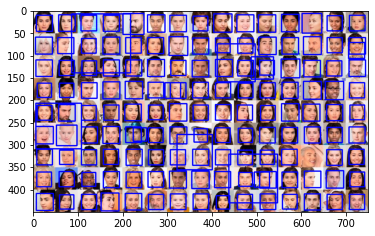

In [121]:
img = cv2.imread('faces.jpg')
converted_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
faces=faceClassifier.detectMultiScale(converted_img,1.05,1)

for x,y,w,h in faces: # comment x,y,w,hs
    cv2.rectangle(converted_img,(x,y),(x+w,y+h),(0,0,255),2)
    face_slice=converted_img[y:y+h,x:x+w]
#plt.figure(figsize=(12,12))
plt.imshow(converted_img)

# Q2 Load the following image and detect faces,eye,smile and write under every detection label “Peter” ,”eye” ,”smile” as arranged.

[[127 122 291 291]]


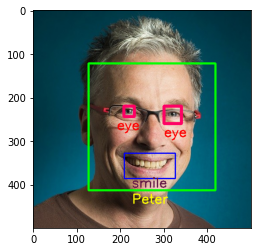

In [110]:
img = cv2.imread('smile.jpg')
converted_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
font2=cv2.FONT_HERSHEY_SIMPLEX
faces=faceClassifier.detectMultiScale(converted_img,scaleFactor=1.05,minNeighbors=6,minSize=(50,50))
print(faces)
for x,y,w,h in faces: # comment x,y,w,h
    face_slice=converted_img[y:y+h,x:x+w]
    cv2.rectangle(converted_img,(x,y),(x+w,y+h),(0,255,0),4)
    cv2.putText(converted_img,"Peter",(x+100,y+h+30),font2,1,(255, 255, 0),2)

    eyes=eyeClassifier.detectMultiScale(face_slice,scaleFactor=1.03,minNeighbors=7,minSize=(10,20))
    for x2,y2,w2,h2 in eyes:
        cv2.rectangle(converted_img,(x+x2,y+y2),(x+x2+w2,y+y2+h2),(255,0,100),5)
        cv2.putText(converted_img,"eye",(x+x2+w2-40,y+y2+h2+30),font2,1,(255, 0, 0),2)

    smile = smileClassifier.detectMultiScale(face_slice,1.8,20)
    for x2,y2,w2,h2 in smile:
        cv2.rectangle(converted_img, (x+x2,y+y2),(x+x2+w2,y+y2+h2), (0, 0, 255), 2)
        cv2.putText(converted_img,"smile",(x+x2+w2-100,y+y2+h2+20),font2,1,(100, 25, 70),2)

plt.imshow(converted_img)
#plt.imshow(face_slice)

# Q3 Run your camera stream and make detection for faces,eye,smile and write under every detection label “me” ,”eye” ,”smile” as arranged. Make circle for eye and others rectangle.

-1
[[282 134 217 217]]
wrong_frame


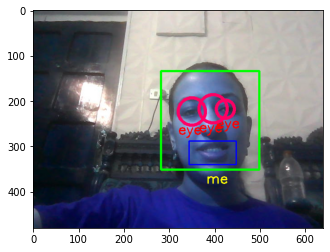

In [118]:
#img = cv2.imread('smile.jpg')
cap = cv2.VideoCapture(0)
while cap.isOpened():
    stat, frame=cap.read()
    if stat==True:
        cv2.imshow("my_video",frame)
        k=cv2.waitKey(10)
        print(k)
  
    #converted_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    font2=cv2.FONT_HERSHEY_SIMPLEX
    faces=faceClassifier.detectMultiScale(frame,scaleFactor=1.05,minNeighbors=6,minSize=(50,50))
    print(faces)
    for x,y,w,h in faces: # comment x,y,w,h
        face_slice=frame[y:y+h,x:x+w]
        eye = frame[y:y + h, x:x + w]  
        smile_fr = frame[y:y + h, x:x + w]
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),4)
        cv2.putText(frame,"me",(x+100,y+h+30),font2,1,(255, 255, 0),2)

        eyes=eyeClassifier.detectMultiScale(face_slice,scaleFactor=1.03,minNeighbors=7,minSize=(10,20))
        for x2,y2,w2,h2 in eyes:
            radius = h2 // 2
            eye_x = int(x2+0.5*w2)
            eye_y = int(y2+0.5*h2)
            cv2.circle(eye,(eye_x,eye_y),radius,(255,0,100),5)
            cv2.putText(frame,"eye",( int(x+x2),int(y+y2+h2+20)),font2,1,(255, 0, 0),2)
        
        smile = smileClassifier.detectMultiScale(face_slice,scaleFactor = 1.7,minNeighbors = 22, minSize =(20,20))
        for x3,y3,w3,h3 in smile:
            cv2.rectangle(smile_fr, (x3,y3),(x3+w3,y3+h3), (0, 0, 255), 2)
            cv2.putText(smile_fr,"smile",(x+x3+w3,y+y3+h3),font2,1,(100, 25, 70),2)

    plt.imshow(frame)
    if k==ord('q'):
            break
    else:
        cv2.destroyAllWindows()
        print("wrong_frame")
        break
cap.release()
cv2.destroyAllWindows()